In [0]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 450kB 56.2MB/s 
     |████████████████████████████████| 3.9MB 60.2MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import layers,optimizers,models,utils
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
print('Train Data:', len(train_data))
print('Test Data:', len(test_data))

Train Data: 8982
Test Data: 2246


In [0]:
print(train_data[0])
print(train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [0]:
def vectorize_sequence(sequence, dimensions=10000):
    result = np.zeros((len(sequence),dimensions))
    for i,sequence in enumerate(sequence):
        result[i,sequence] = 1
    return result

In [0]:
x_train= vectorize_sequence(train_data)
x_test= vectorize_sequence(test_data)

In [0]:
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

In [0]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']   
)

In [0]:
x_valid = x_train[:1000]
partial_x_train = x_train[1000:]
y_valid = y_train[:1000]
partial_y_train = y_train[1000:]

In [0]:
history=model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_valid,y_valid))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 195us/sample - loss: 2.5713 - accuracy: 0.5482 - val_loss: 1.6848 - val_accuracy: 0.6680
Epoch 2/20
7982/7982 [==============================] - 1s 123us/sample - loss: 1.3790 - accuracy: 0.7276 - val_loss: 1.2606 - val_accuracy: 0.7320
Epoch 3/20
7982/7982 [==============================] - 1s 119us/sample - loss: 1.0238 - accuracy: 0.7828 - val_loss: 1.0931 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 121us/sample - loss: 0.8024 - accuracy: 0.8249 - val_loss: 0.9839 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 121us/sample - loss: 0.6342 - accuracy: 0.8662 - val_loss: 0.9287 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 119us/sample - loss: 0.5026 - accuracy: 0.8949 - val_loss: 0.8895 - val_accuracy: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 125us

In [0]:
history_dict=history.history
print(history_dict)

{'loss': [2.5712779053647665, 1.3789684802360984, 1.0237826609247103, 0.8023546675905731, 0.6341583443834978, 0.5025589554060733, 0.40420849949487375, 0.3275600752565264, 0.27083135157472593, 0.23069883911002104, 0.2016062615390291, 0.17603153598559468, 0.15874284317292717, 0.14470999783679256, 0.13688483724869513, 0.13188164180321552, 0.12578830563149873, 0.11882226147080567, 0.11344284143282996, 0.11438151749713892], 'accuracy': [0.5482335, 0.7276372, 0.7827612, 0.8248559, 0.86619896, 0.8948885, 0.91606116, 0.9313455, 0.9401153, 0.94700575, 0.9482586, 0.9508895, 0.95289403, 0.95527434, 0.95539963, 0.9565272, 0.9565272, 0.9564019, 0.9576547, 0.9580306], 'val_loss': [1.6847880668640136, 1.2605720109939575, 1.0930580825805665, 0.9838962984085083, 0.9287057824134827, 0.889511878490448, 0.891102306842804, 0.8904810485839844, 0.8787175498008728, 0.8756257333755493, 0.9261338090896607, 0.9314083733558655, 0.9390015325546265, 0.9215321722030639, 0.975849398612976, 1.0612868919372558, 1.07428

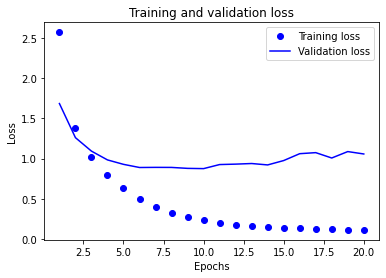

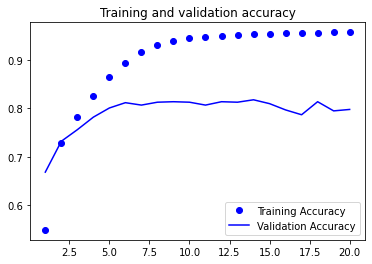

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [0]:
predictions= model.predict(x_test)

In [0]:
predictions.shape

(2246, 46)

In [0]:
predictions[0].sum()

1.0000001

In [0]:
predictions[0].argmax()

3